In [1]:
from google.colab import files
uploaded = files.upload()

Saving Wind Dataset.csv to Wind Dataset.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

Data Preprocessing

In [3]:
path = "Wind Dataset.csv" 
df = pd.read_csv(path)
df.rename(columns={"Date/Time":"Time", "LV ActivePower (kW)":"ActivePower(KW)", "Wind Speed (m/s)": "WindSpeed(m/s)",
                   "Wind Direction(°)":"Wind_Direction"},
                   inplace=True)

In [4]:
df.head()

,Time,ActivePower(KW),WindSpeed(m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645904,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


In [5]:
df.isnull().sum()

Time                             0
ActivePower(KW)                  0
WindSpeed(m/s)                   0
Theoretical_Power_Curve (KWh)    0
Wind Direction (°)               0
dtype: int64

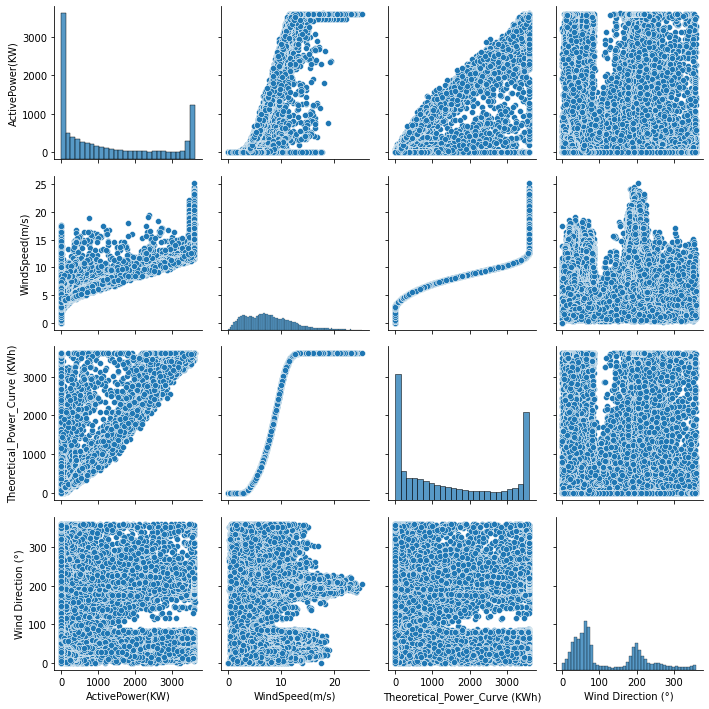

In [6]:
sns.pairplot(df)

                               ActivePower(KW)  WindSpeed(m/s)  \
ActivePower(KW)                       1.000000        0.912774   
WindSpeed(m/s)                        0.912774        1.000000   
Theoretical_Power_Curve (KWh)         0.949918        0.944209   
Wind Direction (°)                   -0.062702       -0.077188   

                               Theoretical_Power_Curve (KWh)  \
ActivePower(KW)                                     0.949918   
WindSpeed(m/s)                                      0.944209   
Theoretical_Power_Curve (KWh)                       1.000000   
Wind Direction (°)                                 -0.099076   

                               Wind Direction (°)  
ActivePower(KW)                         -0.062702  
WindSpeed(m/s)                          -0.077188  
Theoretical_Power_Curve (KWh)           -0.099076  
Wind Direction (°)                       1.000000  


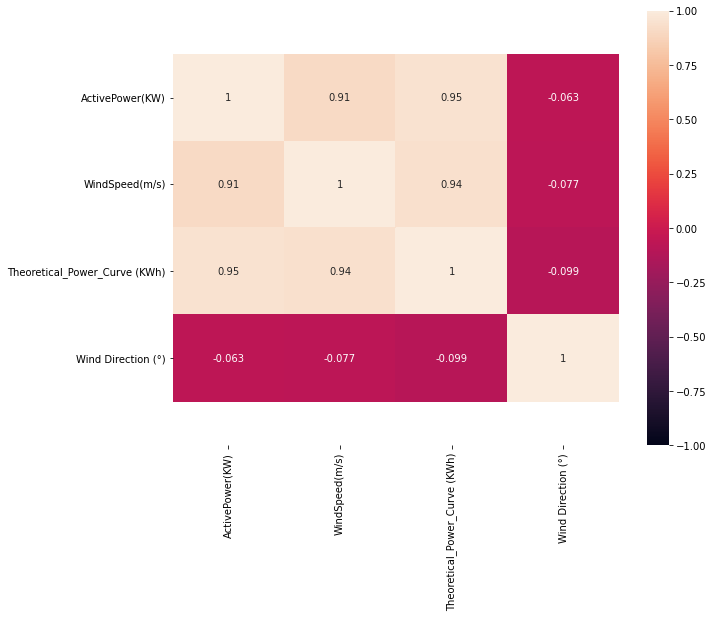

In [7]:
plt.figure(figsize=(10, 8))
corr = df.corr()
ax = sns.heatmap(corr, vmin = -1,vmax = 1,annot = True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

print(corr)

In [8]:
df["Time"] = pd.to_datetime(df["Time"], format = "%d %m %Y %H %M", errors = "coerce")

Splitting the data to Train and Test

In [9]:
y = df["ActivePower(KW)"]
X = df[["Theoretical_Power_Curve (KWh)", "WindSpeed(m/s)"]]

from sklearn.model_selection import train_test_split
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=0)

Model Building

In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,r2_score

forest_model = RandomForestRegressor(n_estimators = 750, max_depth = 4, max_leaf_nodes = 500, random_state = 1)

forest_model.fit(train_X, train_y)

RandomForestRegressor(max_depth=4, max_leaf_nodes=500, n_estimators=750,
                      random_state=1)

In [11]:
power_preds = forest_model.predict(val_X)

print(mean_absolute_error(val_y, power_preds))
print(r2_score(val_y, power_preds))

164.5801552585278
0.911349642890175


In [12]:
joblib.dump(forest_model, "power_prediction.sav")

['power_prediction.sav']

In [13]:
df

,Time,ActivePower(KW),WindSpeed(m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,NaT,380.047791,5.311336,416.328908,259.994904
1,NaT,453.769196,5.672167,519.917511,268.641113
2,NaT,306.376587,5.216037,390.900016,272.564789
3,NaT,419.645904,5.659674,516.127569,271.258087
4,NaT,380.650696,5.577941,491.702972,265.674286
...,...,...,...,...,...
50525,NaT,2963.980957,11.404030,3397.190793,80.502724
50526,NaT,1684.353027,7.332648,1173.055771,84.062599
50527,NaT,2201.106934,8.435358,1788.284755,84.742500
50528,NaT,2515.694092,9.421366,2418.382503,84.297913
